# Learning About SVD

This notebook is a step by step journey to understanding the Singular Value Decomposition (SVD)

In [50]:
# import numpy for SVD function
import numpy
# import matplotlib.pyplot for visualising arrays
import matplotlib.pyplot as plt

## A Simple Matrix

In [51]:
# create a really simple matrix
A = numpy.array([[1,1], [-1,1]])
A

array([[ 1,  1],
       [-1,  1]])

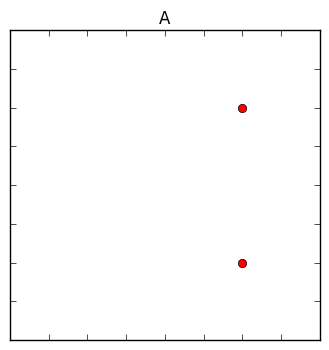

In [90]:
# plot the array
p = plt.subplot(111)
p.axis('scaled')
p.set_title("A")
p.plot(A[0,],A[1,],'ro')
p.axis([-2, 2, -2, 2])
p.set_yticklabels([])
p.set_xticklabels([])
plt.show()

In [53]:
# break it down into an SVD
U, S, V = numpy.linalg.svd(A, full_matrices=True)

In [54]:
# what are U, S and V
print(U, "\n")
print(S, "\n")
print(V, "\n")

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]] 

[ 1.41421356  1.41421356] 

[[-1. -0.]
 [ 0.  1.]] 



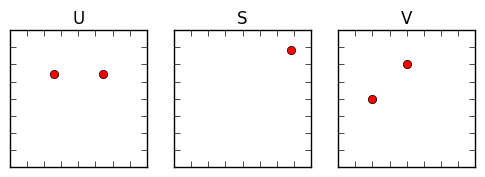

In [85]:
for p in [(131,U, "U"), (132,S, "S"), (133,V, "V")]:
    subplot = p[0]
    matrix = p[1]
    matrix_name = p[2]
    p = plt.subplot(subplot)
    p.axis('scaled')
    p.set_title(matrix_name)
    p.axis([-2, 2, -2, 2])
    p.plot(matrix[0,],matrix[1,],'ro')
    p.set_yticklabels([])
    p.set_xticklabels([])
    pass

plt.show()